In [20]:
import geopandas as gpd
import shapely
import streamlit as st
from shapely.geometry import Point, Polygon, MultiPolygon
import matplotlib.pyplot as plt

def extract_coords(geom):
    coords = []
    if isinstance(geom, Polygon):
        coords = list(geom.exterior.coords)
    elif isinstance(geom, MultiPolygon):
        for poly in geom.geoms:  # Iterate through each polygon in the MultiPolygon
            coords.extend(list(poly.exterior.coords))
    return coords

# Apply to the USA geometry
coords = extract_coords(usa.geometry.values[0])

# Create DataFrame
df_coords = pd.DataFrame(coords, columns=["longitude", "latitude"])

df_coords


,longitude,latitude
0,-122.840000,49.000000
1,-120.000000,49.000000
2,-117.031210,49.000000
3,-116.048180,49.000000
4,-113.000000,49.000000
...,...,...
442,-170.290556,63.194438
443,-170.671386,63.375822
444,-171.553063,63.317789
445,-171.791111,63.405846


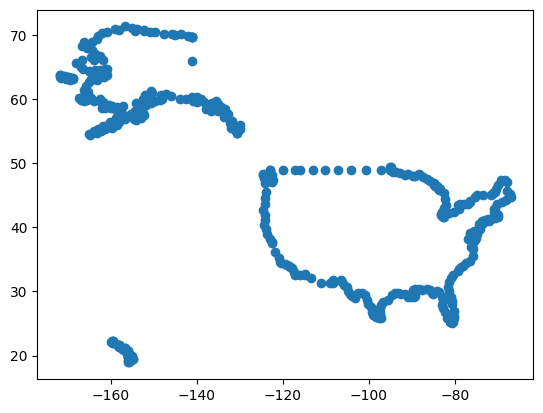

In [24]:
# Load the shapefile
usa = gpd.read_file("/workspaces/4geeks_final_project/data/raw/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")

# Filter for the USA
usa = usa[usa['NAME'] == 'United States of America']

# Function to extract coordinates from a Polygon or MultiPolygon
def extract_coords(geom):
    coords = []
    if isinstance(geom, Polygon):
        coords = list(geom.exterior.coords)
    elif isinstance(geom, MultiPolygon):
        for poly in geom.geoms:  # Iterate through each polygon in the MultiPolygon
            coords.extend(list(poly.exterior.coords))
    return coords

longi = []
lati = []

for long, lat in coords:
    longi.append(long)
    lati.append(lat)


plt.scatter(longi,lati)
plt.show()